# Simulation discrète du modèle microscopique


Ce code présente une validation du modèle microscopique proposé par Chevalier, Le Ny et Malhamé (2015) qui est ensuite généralisé à un modèle de jeu à champ moyen. Le modèle consiste à considérer que chaque conducteur règle sa vitesse par la maximisation d'une fonction d'utilité donné par 
$$f_i = v_i \left( 1 - F\left( \frac1N \sum_{j>i} w(x_j-x_i)\right)\right) -\frac1 2 \alpha v_i^2$$
où les conducteurs sont ordonnés de façon croissante (le conducteur 1 est derrière tout le monde).

On montrera l'application de ce modèle à un nombre de joueurs petit (N=2 et N=3)

In [1]:
# Importation des modules à utiliser
import numpy as np
import matplotlib.pyplot as plt

## Simulation pour deux joueurs

Dans ce cas-ci, les fonctions utilité sont:
$$ f_1 = v_1 \left( 1 - F\left( \frac {w(x_2 - x_1)} 2 \right)\right) -\frac1 2 \alpha v_1^2 $$
$$ f_2 = v_2 - \frac1 2 \alpha v_2^2 $$

Par la suite, on considérera $F(x) = x$ et $w(y) = \frac1{\lambda}e^{-\frac{y}{\lambda}}$ avec $\lambda$ un paramètre que l'on précisera.

Notons que le conducteur 2 peut regler sa vitesse pour qu'elle soit maximale. Cela est cohérent avec le fait que les conducteurs ne prennent en compte que les conducteurs en avant. Ainsi, $v_2 = v_{max} = \frac1{\alpha}$.

Pour le joueur 1, la vitesse doit se calculer à chaque instant et est donnée par : 
$$v_1 = \frac1{\alpha}\left( 1 - \frac1{2\lambda}e^{-\frac{x_2 - x_1}{\lambda}}\right)$$

In [2]:
# Définition de la fonction 
def ModeleDeuxConducteurs(T,N,alpha,lda,x1,x2):
    dt = T/N
    t = np.linspace(0,T,N+1)
    v2max = 1/alpha
    for i in range(N):
        v1 = 1/alpha * (1 - 1/(2*lda) * np.exp(-(x2[-1]-x1[-1])/lda))
        x2.append(x2[-1] + v2max * dt)
        x1.append(x1[-1] + v1 * dt)
    return x1,x2,t

Text(0, 0.5, 'position (m)')

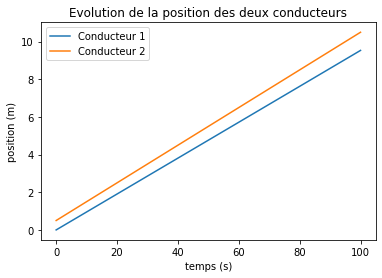

In [3]:
# Définition des paramètres de la simulation
T = 100
N = 1000
alpha = 10
lda = 10 # paramètre lambda 
x1 = [0]
x2 = [0.5]
    
# Plot
x1, x2, t = ModeleDeuxConducteurs(T,N,alpha,lda,x1,x2)
plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.legend()
plt.title("Evolution de la position des deux conducteurs")
plt.xlabel("temps (s)")
plt.ylabel("position (m)")

Ici on pourrait montrer que :
* S'ils sont relativement proches au début, le conducteur 1 règle sa vitesse pour s'éloigner
* S'ils sont sufisamment loin l'un de l'autre, ils restent à la même distance
* Le facteur $\frac1N$ ne paraît pas être adapté (prendre le cas w est un delta de Dirac)

Il manque la comparaison avec un autre modèle micro.

## Simulation pour trois joueurs.

Dans ce cas-ci, les fonctions d'utilité sont :
$$ f_1 = v_1 \left( 1 - F\left( \frac1 3 (w(x_3 - x_1) + w(x_2-x_1))\right)\right) -\frac1 2 \alpha v_1^2 $$
$$ f_2 = v_2 \left( 1 - F\left( \frac1 3 w(x_3 - x_2)\right)\right) -\frac1 2 \alpha v_2^2 $$
$$ f_3 = v_3 - \frac12 v_3^2 $$

Nous utiliserons les mêmes fonctions $F$ et $w$ que pour le cas à deux joueurs.

Les vitesses sont données alors par 
$$v_1 = \frac1{\alpha} \left( 1 - \frac1 3(w(x_3-x_1) + w(x_2 - x_1)\right) $$
$$ v_2 = \frac1{\alpha} \left( 1 - \frac1 3 w(x_3-x_2)\right) $$
$$ v_3 = \frac1{\alpha} $$

In [4]:
def ModeleTroisConducteurs(T,N,alpha,lda,x1,x2,x3):
    dt = T/N
    t = np.linspace(0,T,N+1)
    v3max = 1/alpha
    for i in range(N):
        v1 = 1/alpha * (1 - 1/(3*lda) * (np.exp(-(x2[-1]-x1[-1])/lda) + np.exp(-(x3[-1]-x1[-1])/lda)))
        v2 = 1/alpha * (1 - 1/(3*lda) * np.exp(-(x3[-1]-x2[-1])/lda))
        x3.append(x3[-1] + v3max * dt)
        x2.append(x2[-1] + v2 * dt)
        x1.append(x1[-1] + v1 * dt) 
    return x1,x2,x3,t

Text(0, 0.5, 'position (m)')

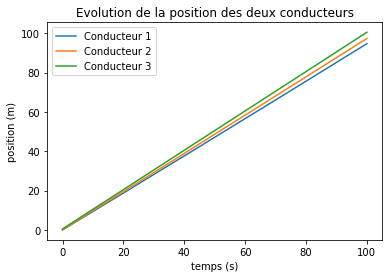

In [5]:
# Définition des paramètres de la simulation
T = 100
N = 1000
alpha = 1
lda = 10 # paramètre lambda 
x1 = [0]
x2 = [0.1]
x3 = [0.5]
    
# Plot
x1, x2,x3, t = ModeleTroisConducteurs(T,N,alpha,lda,x1,x2,x3)
plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.plot(t,x3,label="Conducteur 3")
plt.legend()
plt.title("Evolution de la position des deux conducteurs")
plt.xlabel("temps (s)")
plt.ylabel("position (m)")